In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] ='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15

# Chaos
## Modeling Life, chapter 5, class 2
IBM3101 - Francisco Sahli

### 5.3 Routes to chaos

Logistic equation:
$$X_{N+1} = rX_N(1  - X_N)$$

Equilibrium point in discrete time model:
$$\begin{eqnarray}
X_{N+1} &=& X_N\\
rX_N(1  - X_N) &=& X_N\\
r(1 - X_N) &=& 1\\
\rightarrow X_{eq} &=& \frac{r - 1}{r}
\end{eqnarray}$$




Text(0, 0.5, '$X_N$')

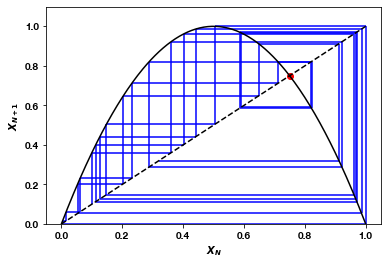

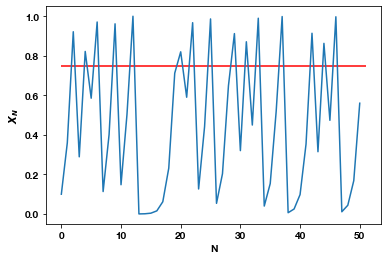

In [72]:
r = 4

if r < 0:
    Xn = np.linspace(-0.5, 1.5, 300)
else:
    Xn = np.linspace(0, 1.0, 300)
Xnp1 = r*Xn*(1 - Xn)

plt.plot(Xn, Xnp1,'k')
plt.plot(Xn,Xn,'k--')

N = 50

X = [.1]
for i in range(N):
    X.append(r*X[-1]*(1 - X[-1]))
    
N_plot = 30

for i in range(N_plot):
    plt.vlines(X[i],X[i],X[i+1],'b')
    plt.hlines(X[i+1],X[i],X[i+1],'b')
    
X_eq = (r - 1)/r

plt.scatter([X_eq],[X_eq], color = 'red')
    
plt.ylim([Xnp1.min()*1.1,Xnp1.max()*1.1])
plt.xlabel('$X_N$')
plt.ylabel('$X_{N+1}$')   

plt.figure()

plt.plot(X)
plt.hlines(X_eq, 0, len(X), 'r')
plt.xlabel('N')
plt.ylabel('$X_N$')

**Stability of the equilibrium point**

Linearization around the equilibrium point:
$$X_{N+1} - X_{eq} = \frac{df}{dX}\bigg\rvert_{X_{eq}}(X_N - X_{eq})$$

If $\bigg\rvert \frac{df}{dX}\bigg\rvert_{X_{eq}} < 1$ the equilibrium point is stable, otherwise the difference between $X_{N+1} - X_{eq}$ and $X_{N} - X_{eq}$ will get bigger and bigger.

For the logistic model:
$$ \frac{df}{dX}\bigg\rvert_{X_{eq}} = 2 - r$$,

Then, the equilibrium point $X_{eq} = \frac{r - 1}{r}$ is stable when: 
$$1 < r < 3$$

Verify that this is true for different values of r by running the code in the next cell


Text(0, 0.5, '$X_N$')

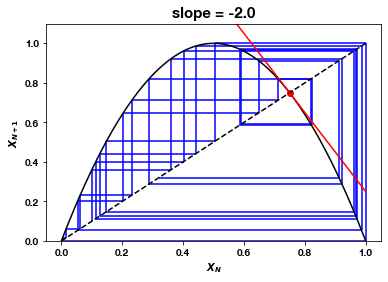

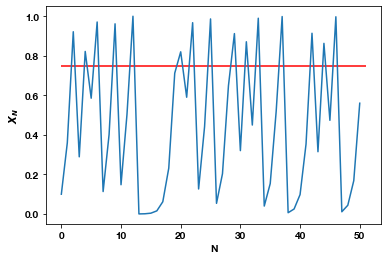

In [73]:
r = 4

if r < 0:
    Xn = np.linspace(-0.5, 1.5, 300)
else:
    Xn = np.linspace(0, 1.0, 300)
Xnp1 = r*Xn*(1 - Xn)

plt.plot(Xn, Xnp1,'k')
plt.plot(Xn,Xn,'k--')

N = 50

X = [.1]
for i in range(N):
    X.append(r*X[-1]*(1 - X[-1]))
    
N_plot = 30

for i in range(N_plot):
    plt.vlines(X[i],X[i],X[i+1],'b')
    plt.hlines(X[i+1],X[i],X[i+1],'b')
    
X_eq = (r - 1)/r

plt.scatter([X_eq],[X_eq], color = 'red')
plt.plot(Xn, (2 - r)*(Xn - X_eq) + X_eq, color = 'red')

plt.title('slope = %.1f' % (2 - r))
plt.ylim([Xnp1.min()*1.1,Xnp1.max()*1.1])
plt.xlabel('$X_N$')
plt.ylabel('$X_{N+1}$')   

plt.figure()

plt.plot(X)
plt.hlines(X_eq, 0, len(X), 'r')
plt.xlabel('N')
plt.ylabel('$X_N$')

Text(0, 0.5, 'X')

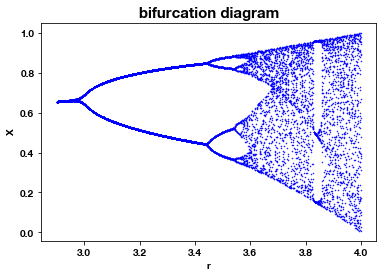

In [74]:
N = 100

Rs = np.linspace(2.9,4, 500)



n_plot = 20

for r in Rs:
    X = [.1]
    for i in range(N):
        X.append(r*X[-1]*(1 - X[-1]))
    plt.plot([r]*n_plot, X[-n_plot:],'b.', markersize = 1)    
 

plt.title('bifurcation diagram')
plt.xlabel('r')
plt.ylabel('X')

Run the model with `r = 2.9, 3.35, 3.53, 4`, to confirm what you see in the bifurcation diagram

Text(0, 0.5, '$X_N$')

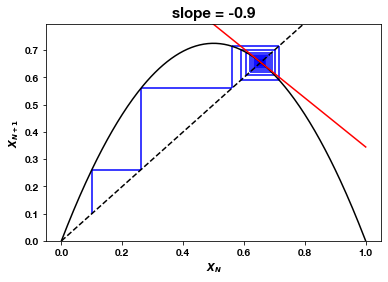

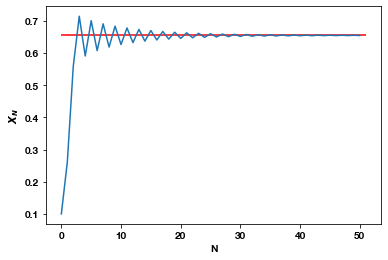

In [75]:
r = 2.9

if r < 0:
    Xn = np.linspace(-0.5, 1.5, 300)
else:
    Xn = np.linspace(0, 1.0, 300)
Xnp1 = r*Xn*(1 - Xn)

plt.plot(Xn, Xnp1,'k')
plt.plot(Xn,Xn,'k--')

N = 50

X = [.1]
for i in range(N):
    X.append(r*X[-1]*(1 - X[-1]))
    
N_plot = 30

for i in range(N_plot):
    plt.vlines(X[i],X[i],X[i+1],'b')
    plt.hlines(X[i+1],X[i],X[i+1],'b')
    
X_eq = (r - 1)/r

plt.scatter([X_eq],[X_eq], color = 'red')
plt.plot(Xn, (2 - r)*(Xn - X_eq) + X_eq, color = 'red')

plt.title('slope = %.1f' % (2 - r))
plt.ylim([Xnp1.min()*1.1,Xnp1.max()*1.1])
plt.xlabel('$X_N$')
plt.ylabel('$X_{N+1}$')   

plt.figure()

plt.plot(X)
plt.hlines(X_eq, 0, len(X), 'r')
plt.xlabel('N')
plt.ylabel('$X_N$')

### 5.4 Stretching and folding: the mechanism of chaos

<img src="Ch5Images/stretch.png" alt="drawing"/>

In [76]:
def PHC(y, t, a1, b1, a2, b2, d1, d2):
    X, Y, Z = y
    Xp = X*(1-X) - a1*X/(1 + b1*X)*Y
    Yp = a1*X/(1 + b1*X)*Y - d1*Y - a2*Y/(1 + b2*Y)*Z
    Zp = a2*Y/(1 + b2*Y)*Z - d2*Z
    
    return [Xp, Yp, Zp]

a1 = 5
b1 = 3
a2 = 0.1
b2 = 2
d1 = 0.4
d2 = 0.01

time = np.linspace(0,2500,2500)
Y0_init = [1,0.03,9]
Y0s = np.random.randn(1000,3)*0.001 + np.array(Y0_init)
Ys = []
for Y0 in Y0s:
    Y = odeint(PHC, Y0, time, args = (a1, b1, a2, b2, d1, d2))
    Ys.append(Y)
    
Ys = np.array(Ys)
    



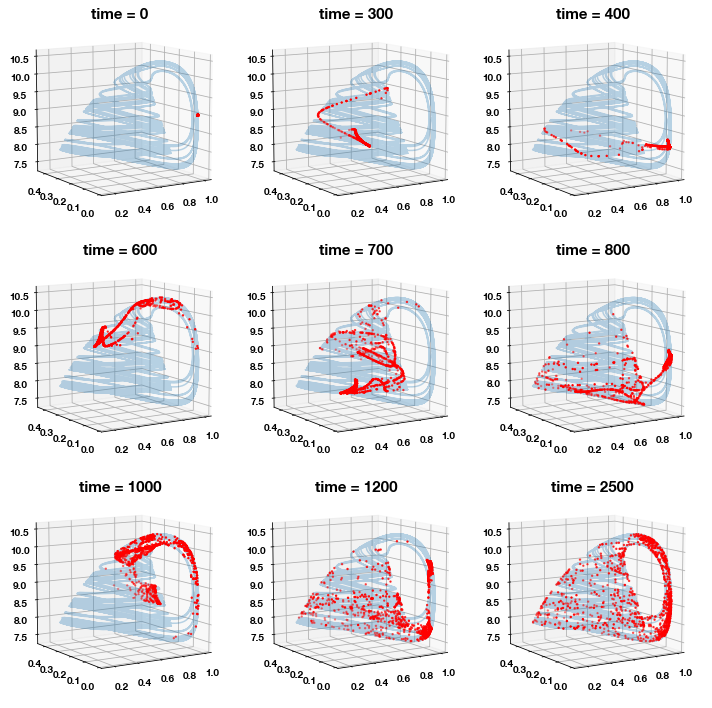

In [77]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

times = [0, 300, 400, 600, 700, 800, 1000, 1200, -1]
fig = plt.figure()
fig.set_size_inches((10,10))

for i, t in enumerate(times):
    ax = fig.add_subplot(3,3, i + 1, projection='3d')
    ax.plot(Ys[-1,:,0], Ys[-1,:,1], Ys[-1,:,2], alpha = 0.3)


    ax.scatter(Ys[:,t,0], Ys[:,t,1], Ys[:,t,2], color = 'red', s = 2)

    ax.view_init(10,-122)
    ax.set_title('time = %d' % time[t])
    
plt.tight_layout()

### 5.5 Chaos in nature

Poincaré plots, random vs. chaotic

Text(0, 0.5, '$X_{N+1}$')

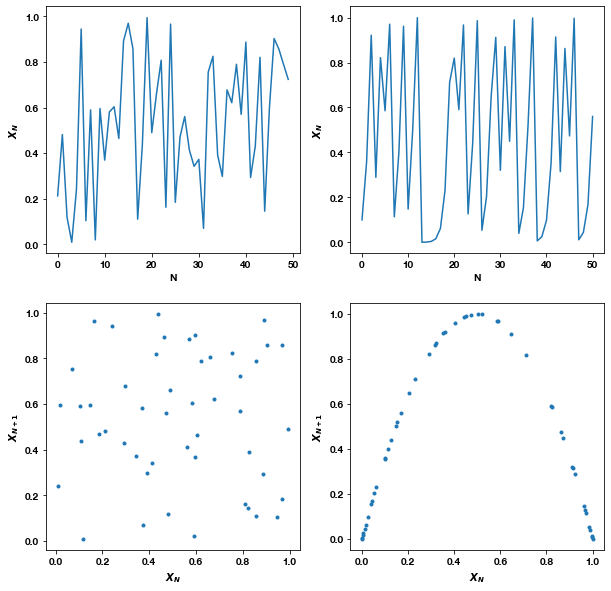

In [80]:
r = 4

N = 50

X = [.1]
for i in range(N):
    X.append(r*X[-1]*(1 - X[-1]))
    
X_rand = np.random.uniform(0, 1, N)

fig = plt.figure()
fig.set_size_inches((10,10))
plt.subplot(221)
plt.plot(X_rand)
plt.xlabel('N')
plt.ylabel('$X_N$')

plt.subplot(222)
plt.plot(X)
plt.xlabel('N')
plt.ylabel('$X_N$')

plt.subplot(223)
plt.plot(X_rand[:-1],X_rand[1:],'.')
plt.xlabel('$X_N$')
plt.ylabel('$X_{N+1}$') 

plt.subplot(224)
plt.plot(X[:-1],X[1:],'.')
plt.xlabel('$X_N$')
plt.ylabel('$X_{N+1}$') 

**Chaos in neurons**

Text(0, 0.5, 'w')

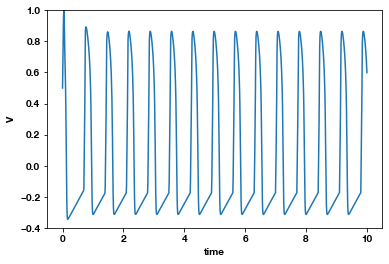

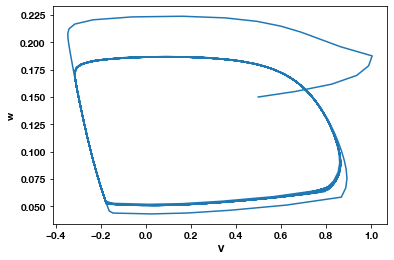

In [82]:
def Iext(t, tstart, duration, amplitude, period):
    return (tstart <= (t % period) <= (tstart + duration))*amplitude

def FHN(Y, t, eps, a, gamma, tstart, duration, amplitude, period):
    V, w = Y
    I = Iext(t, tstart, duration, amplitude, period)
    Vp = (- w + V*(1 - V)*(V - a) + I)/eps
    wp = V - gamma*w
    return [Vp, wp]

Y0 = [0.5, 0.15]

tstart = 0.0
duration = 0.05
amplitude = 0.2
period = 0.7
eps = 0.01
gamma = 0.5
a = 0.1

time = np.linspace(0, 10, 1000)

Y = odeint(FHN, Y0, time, args = (eps, a, gamma, tstart, duration, amplitude, period))

plt.plot(time, Y[:,0])
plt.ylim([-0.4,1])
plt.xlabel('time')
plt.ylabel('V')


plt.figure()
plt.plot(Y[:,0], Y[:,1])
plt.xlabel('V')
plt.ylabel('w')

decrease the `period` until you start seeing a chaotic response. How do you know is chaotic?

Text(0, 0.5, '$I_{N+1}$')

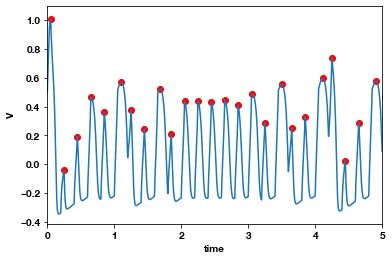

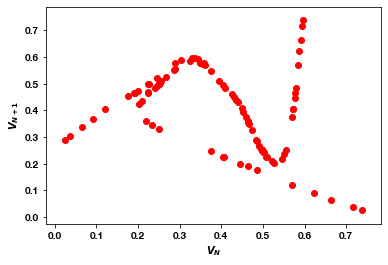

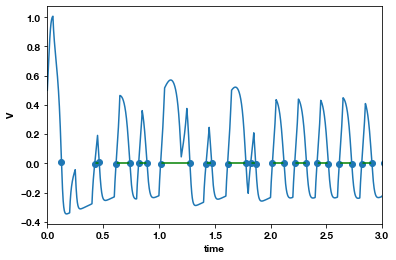

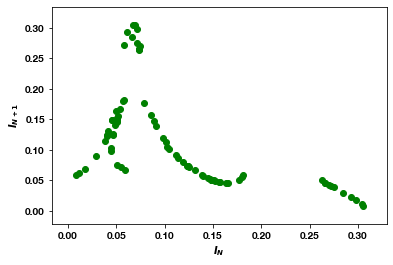

In [88]:
from scipy.signal import find_peaks


period = 0.2
time = np.linspace(0, 20, 20000)

Y = odeint(FHN, Y0, time, args = (eps, a, gamma, tstart, duration, amplitude, period))



peaks = find_peaks(Y[:,0])[0]

plt.plot(time, Y[:,0])
plt.scatter(time[peaks], Y[peaks,0], color = 'red')
plt.xlabel('time')
plt.ylabel('V')
plt.xlim([0, 5]) 

Vp = Y[peaks[2:],0] # discard the first peak that sensible to initial conditions

plt.figure()
plt.scatter(Vp[:-1], Vp[1:], color = 'red')
plt.xlabel('$V_N$')
plt.ylabel('$V_{N+1}$')


# generate a signal that peaks at V = 0
Vc0 = -np.abs(Y[:,0])
peaks_time = find_peaks(Vc0, height = -0.01)[0]

plt.figure()

plt.plot(time, Y[:,0])
plt.scatter(time[peaks_time], Y[peaks_time,0])

intervals = []
for i in range(1,len(peaks_time)-2,2):
    plt.hlines(0, time[peaks_time[i]], time[peaks_time[i + 1]], color = 'green')
    intervals.append(time[peaks_time[i+1]] - time[peaks_time[i]])
                                                  
plt.xlim([0, 3])                                                 
plt.xlabel('time')
plt.ylabel('V')
    
plt.figure()
                                                  
plt.scatter(intervals[:-1], intervals[1:], color = 'green')
plt.xlabel('$I_N$')
plt.ylabel('$I_{N+1}$')